In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pandas import DataFrame

In [3]:
from io import BufferedReader, open

In [4]:
import google.protobuf.internal.decoder as decoder

In [5]:
from protobuf_to_dict import protobuf_to_dict

In [6]:
def ReadItm(fname, constructor, size_limit = 0):
    ''' Reads and parses a length prefixed protobuf messages from file. 
        The file MUST not be corrupted. The parsing is equivalent to parseDelimitedFrom.
        http://dev.pawelsz.eu/2016/05/read-from-file-length-prefixed-protocol.html
    '''
    f = None
    if fname.endswith('.gzip'):
        f = gzip.open(fname, 'rb')
    else:
        f = open(fname, 'rb')
    reader = BufferedReader(f)
    bytes_read = 0
    while size_limit<=0 or bytes_read<size_limit:
        buffer = reader.peek(10)
        if len(buffer) == 0:
            break
        (size, position) = decoder._DecodeVarint(buffer, 0)
        reader.read(position)
        itm = constructor()
        itm.ParseFromString(reader.read(size))
        bytes_read = bytes_read + position + size
        yield protobuf_to_dict(itm)
    f.close()

In [7]:
import behavior_pb2, maze_pb2

## Read behavior data

In [14]:
behavior = DataFrame(ReadItm('../sessions/000001/behavior/behavior.data', behavior_pb2.Data))

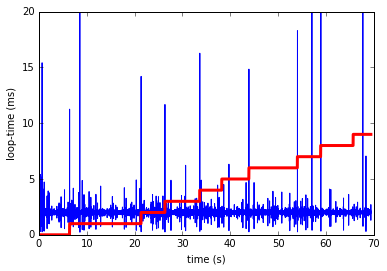

In [46]:
#plt.plot(behavior.time/1000, 10*behavior.collision, color = 'g')
#plt.plot(behavior.time/1000, 80*behavior.velocityForward, linewidth = 3, color = 'c')
plt.plot(behavior.time/1000, behavior.deltaTime, color = 'b')
plt.plot(behavior.time/1000, behavior.trialNumber, linewidth = 3, color = 'r')
plt.ylim([0, 20])
#plt.xlim([10, 40])
plt.xlabel('time (s)')
plt.ylabel('loop-time (ms)')

In [17]:
x = behavior.deltaTime.copy()

In [18]:
x[1:].var()

0.3693477627384855

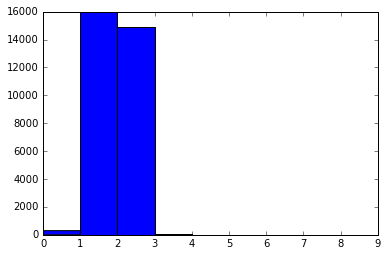

In [13]:
plt.hist(behavior.deltaTime, bins=range(0,10,1));

## Read maze data

In [156]:
def draw(maze):
    for area in maze['area']:
        plt.fill(area['x'], area['y'], edgecolor=[0.7, 0.7, 0.7], facecolor=[0.7, 0.7, 0.7], lw=1.5);
    for area in maze['triggers']:
        plt.fill(area['x'], area['y'], edgecolor=[0.5, 0.5, 1], facecolor=[0.5, 0.5, 1], lw=1.5);
    for line in maze['links']:
        plt.plot(line['x'][0:2], line['y'][0:2], color=[0.5, 0.7, 0.5], lw=3);
        plt.plot(line['x'][2:4], line['y'][2:4], color=[0.5, 0.7, 0.5], lw=3);
    for line in maze['borders']:
        plt.plot(line['x'], line['y'], color=[0.2, 0.2, 0.2], lw=3);  
    plt.axis('off')

In [157]:
def trace(behavior):
    plt.plot(behavior.positionLateral, behavior.positionForward, '.', color=[0.7, 0.1, 0.1])

In [158]:
trials = list(ReadItm('../sessions/000001/behavior/maze.data', maze_pb2.Data))

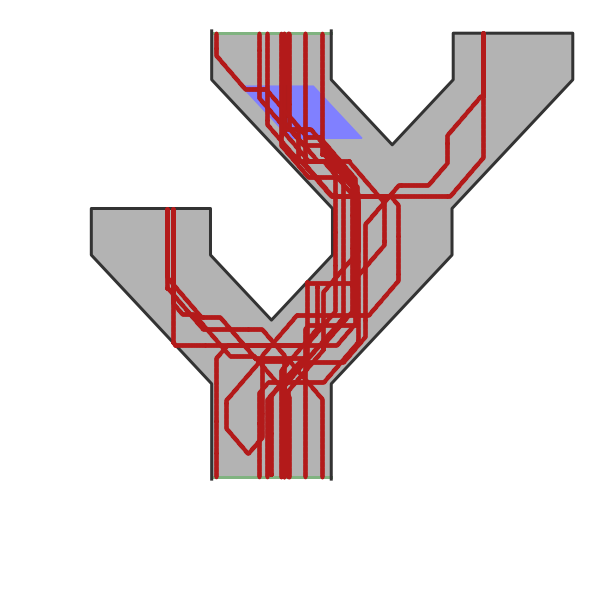

In [159]:
plt.figure(figsize=(10, 10))
draw(trials[0]['maze'])
trace(behavior)

In [160]:
[x['maze']['name'] for x in trials]

[u'twoChoice.maze',
 u'twoChoiceAlt.maze',
 u'twoChoice.maze',
 u'twoChoiceAlt.maze',
 u'twoChoice.maze',
 u'twoChoiceAlt.maze',
 u'twoChoice.maze',
 u'twoChoiceAlt.maze',
 u'twoChoice.maze',
 u'twoChoiceAlt.maze',
 u'twoChoice.maze']

In [161]:
[x['trial'] for x in trials]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]